# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [210]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [211]:
Cars_data = pd.read_excel("Cars.xlsx")
Cars_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198,4341,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220,4354,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215,4312,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225,4425,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190,3850,8.5,70,1,"""amc ambassador dpl"""


In [212]:
Cars_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
337,32.4,4,107.0,72,2290,17.0,80,3,"""honda accord"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
380,36.0,4,120.0,88,2160,14.5,82,3,"""nissan stanza xe"""
220,33.5,4,85.0,70,1945,16.8,77,3,"""datsun f-10 hatchback"""
13,14.0,8,455.0,225,3086,10.0,70,1,"""buick estate wagon (sw)"""
347,37.0,4,85.0,65,1975,19.4,81,3,"""datsun 210 mpg"""
136,16.0,8,302.0,140,4141,14.0,74,1,"""ford gran torino"""
32,25.0,4,98.0,?,2046,19.0,71,1,"""ford pinto"""
61,21.0,4,122.0,86,2226,16.5,72,1,"""ford pinto runabout"""
231,15.5,8,400.0,190,4325,12.2,77,1,"""chrysler cordoba"""


## Observations:
### So from the above top 10/randon sample 10 rows displayed, We can see that the dataset has the following columns (with their type):

#### mpg: continuous
#### cylinders: multi-valued discrete
#### displacement: continuous
#### horsepower: continuous
#### weight: continuous
#### acceleration: continuous
#### model year: multi-valued discrete
#### origin: multi-valued discrete
#### car name: string

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [213]:
Cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [214]:
Cars_data.shape

(398, 9)

In [215]:
Cars_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
model year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,NaN,NaN,NaN,1.57286,0.802055,1,1,1,2,3
car name,398,305,"""ford pinto""",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations:
### horsepower feature is missing in the describe output. horsepower feature should have numeric values, but here the the datatype is object. Some issues/errors might be there in the data which needs to be rectified.

# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [216]:
Cars_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Observation:
### There is no null value in the dataset, but still there is some issue with horsepower values 
### as it is taken as object data type. There should be some non numeric values. Let us identify it.

In [217]:
# Get the records where the horsepower is not numeric
Cars_data[Cars_data.horsepower.str.isdigit() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035,20.5,82,1,"""amc concord dl"""


In [218]:
Cars_data = Cars_data.replace('?', np.nan)
Cars_data['horsepower'] = Cars_data['horsepower'].astype('float64')
Cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [219]:
# Treating missing values in horsepower with median
print ("Before missing value treatment: ")
print (Cars_data.isna().sum())
print ("=======================================")
Cars_data = Cars_data.fillna(Cars_data.median())
print ("After missing value treatment: ")
print (Cars_data.isna().sum())

Before missing value treatment: 
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
After missing value treatment: 
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


## Observations:
### As the horsepower feature had "?" as value, the datatype of it is taken as object. Now we have identified and replaced it with median value. Now the missing/incorrect value is treated and data is ready for anlysis.

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

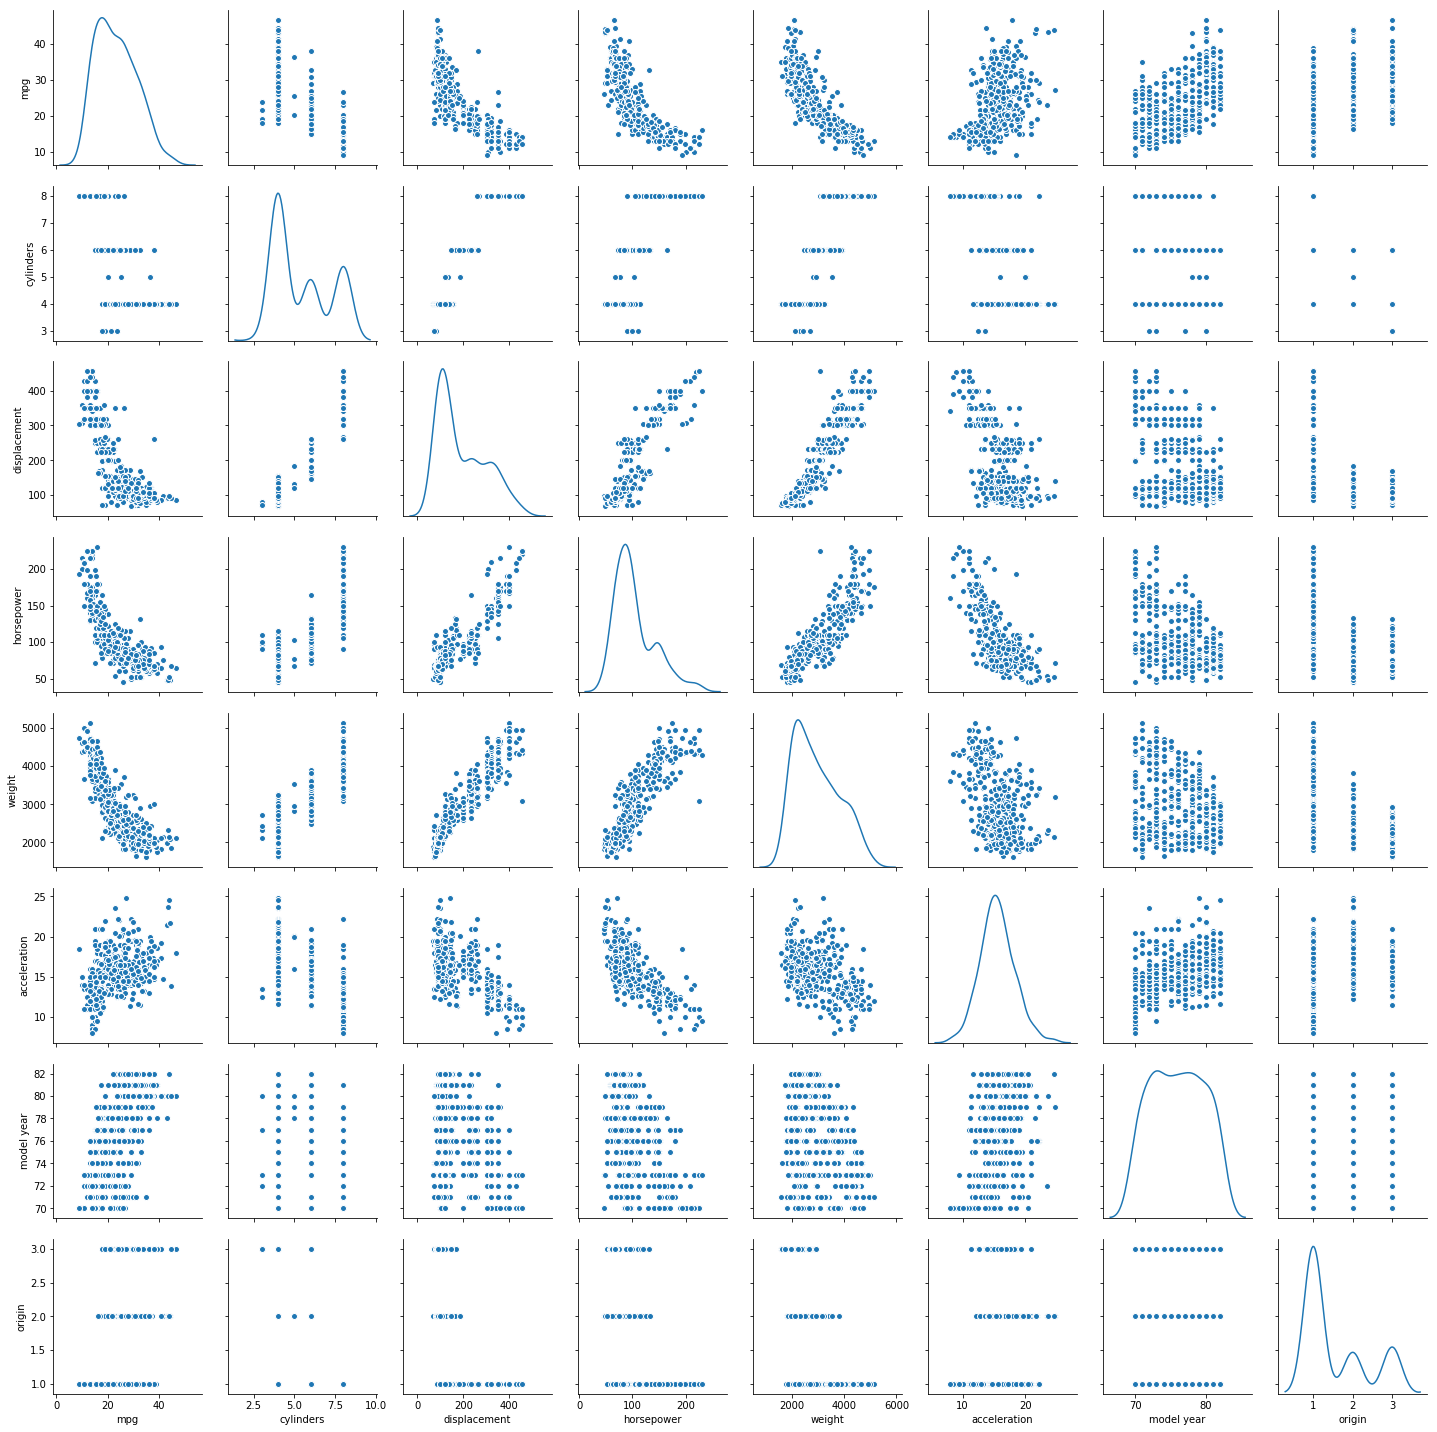

In [220]:
sns.pairplot(Cars_data, diag_kind='kde')

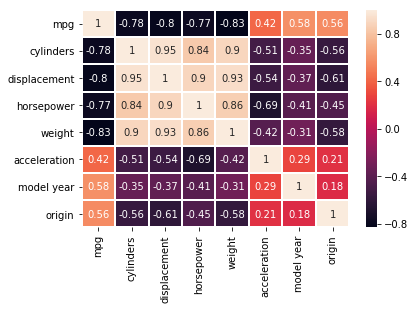

In [221]:
sns.heatmap(Cars_data.corr(), annot=True, linewidths=1)

## Observation:
### From the diagonal Kde it is evident that, there is atleast 3 good clusters in the data.
### With the scattor plot we can infer the below relationship between features.
### --> There is strong positive linear relationship between Displacement and Weight , Displacement and   Horsepower, Horsepower and weight.
### --> There is weak positive linear relationship between mpg and accelaration.
### --> There is weak negative linear relationship between Displacement and accelaration, horsepower and accelaration, weight and accelaration.
### --> There is a strong negative non-linear relationship between mpg and displacement, mpg and weight, mpg and horsepower.
### --> We have max mpg for 4 cylinder vehicles.

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [222]:
# Further dig into data shows max mpd is for 4 cylinders vehicles

# Year would be more effective if we can transorm this to calculate age of vehicle. 
# This dataset was used in 1983 so we would subtract year from 83 to get the age
Cars_data['Car_Age'] = 83 - Cars_data['model year']

#Cars_data['hp_per_wt'] = Cars_data['horsepower'] / Cars_data['weight']

# Origin indicates production point so should be broken into dummy variables
Cars_data = pd.get_dummies(Cars_data, columns=['origin'], prefix = ['origin'], drop_first=True)

In [223]:
Cars_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Car_Age,origin_2,origin_3
41,14.0,8,318.0,150.0,4096,13.0,71,"""plymouth fury iii""",12,0,0
79,26.0,4,96.0,69.0,2189,18.0,72,"""renault 12 (sw)""",11,1,0
40,14.0,8,351.0,153.0,4154,13.5,71,"""ford galaxie 500""",12,0,0
65,14.0,8,351.0,153.0,4129,13.0,72,"""ford galaxie 500""",11,0,0
376,37.0,4,91.0,68.0,2025,18.2,82,"""mazda glc custom l""",1,0,1
62,13.0,8,350.0,165.0,4274,12.0,72,"""chevrolet impala""",11,0,0
341,23.5,6,173.0,110.0,2725,12.6,81,"""chevrolet citation""",2,0,0
26,10.0,8,307.0,200.0,4376,15.0,70,"""chevy c20""",13,0,0
314,26.4,4,140.0,88.0,2870,18.1,80,"""ford fairmont""",3,0,0
355,33.7,4,107.0,75.0,2210,14.4,81,"""honda prelude""",2,0,1


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [224]:
# Missing value check was done above and hp column was treated with median values

from scipy.stats import zscore

# Standardizing with zscore excluding car name and model year
Cars_data_z = Cars_data.drop(columns=['car name', 'model year'])
Cars_data_z = Cars_data_z.apply(zscore)

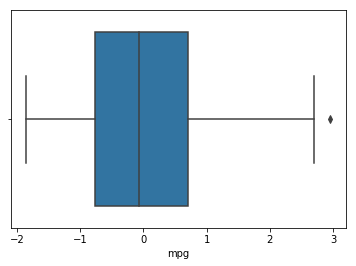

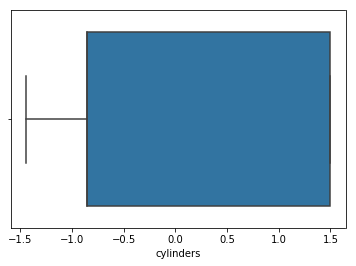

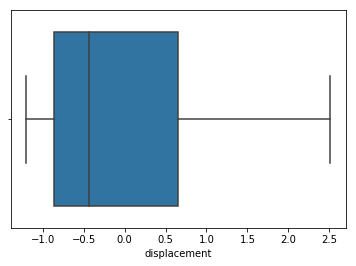

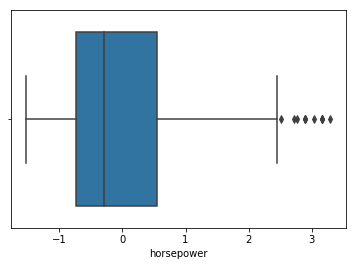

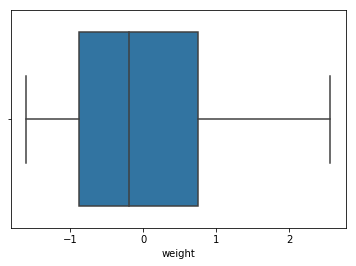

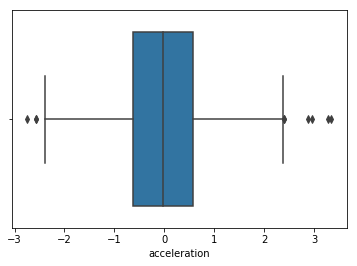

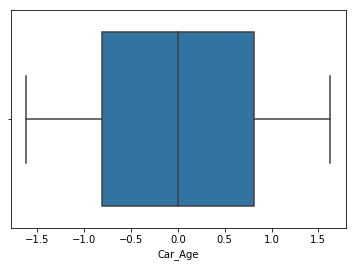

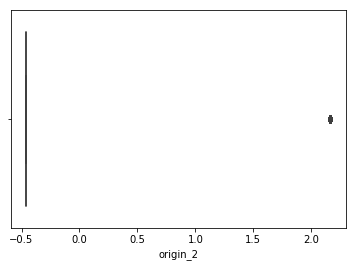

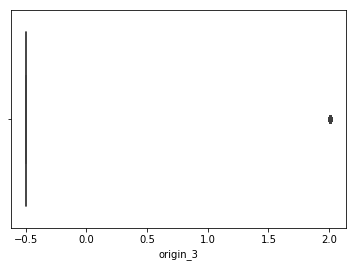

In [225]:
# Let us check for outliers now
#Cars_data_z.boxplot()

for i, col in enumerate(Cars_data_z):
    plt.figure(i)
    sns.boxplot(Cars_data_z[col])

## Observations:
### There are more outliers in horsepower and accelaration.
### As we have atleast 3 good clusters, let us treat the outliers with median after seperating the clusters.

# Q7. Create appropriate clusters with the new data set

In [226]:
cluster_range = range( 2, 8)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5, random_state=1)
  clusters.fit(Cars_data_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2003.994192
1,3,1545.667963
2,4,1152.282908
3,5,951.664888
4,6,873.613133
5,7,802.949007


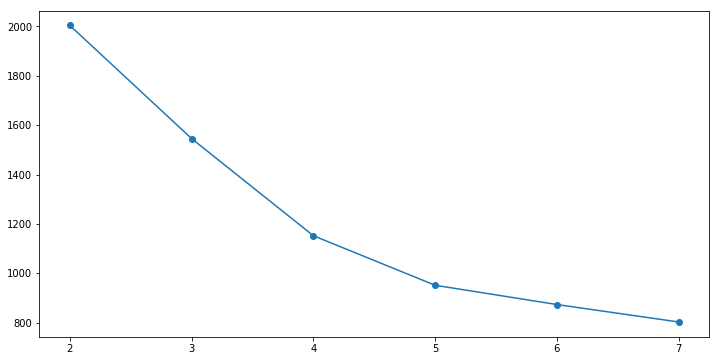

In [227]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

In [228]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(Cars_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables. 

In [229]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.02203444, -0.21633581, -0.14358462, -0.36133873, -0.14412913,
         0.36954736, -0.22989848, -0.46196822, -0.49764335],
       [ 0.88853686, -0.79671268, -0.87111673, -0.64096526, -0.88580863,
         0.21932196, -0.38803035, -0.46196822,  2.00947124],
       [ 0.56069261, -0.76382189, -0.80933381, -0.61233027, -0.64688975,
         0.4426122 ,  0.05300993,  2.16465108, -0.49764335],
       [-1.12726026,  1.4864187 ,  1.46865697,  1.47338845,  1.36736404,
        -1.03371846,  0.61198576, -0.46196822, -0.49764335]])

In [230]:
centroid_df = pd.DataFrame(centroids, columns = list(Cars_data_z) )
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,Car_Age,origin_2,origin_3
0,0.022034,-0.216336,-0.143585,-0.361339,-0.144129,0.369547,-0.229898,-0.461968,-0.497643
1,0.888537,-0.796713,-0.871117,-0.640965,-0.885809,0.219322,-0.388030,-0.461968,2.009471
2,0.560693,-0.763822,-0.809334,-0.612330,-0.646890,0.442612,0.053010,2.164651,-0.497643
3,-1.127260,1.486419,1.468657,1.473388,1.367364,-1.033718,0.611986,-0.461968,-0.497643


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [231]:
prediction=cluster.predict(Cars_data_z)
Cars_data_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [232]:
Cars_data_z.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,Car_Age,origin_2,origin_3,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1.627426,-0.461968,-0.497643,3
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1.627426,-0.461968,-0.497643,3
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1.627426,-0.461968,-0.497643,3
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1.627426,-0.461968,-0.497643,3
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1.627426,-0.461968,-0.497643,3
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,1.627426,-0.461968,-0.497643,3
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,1.627426,-0.461968,-0.497643,3
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,1.627426,-0.461968,-0.497643,3
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,1.627426,-0.461968,-0.497643,3
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,1.627426,-0.461968,-0.497643,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001758ECC2128>,
      dtype=object)

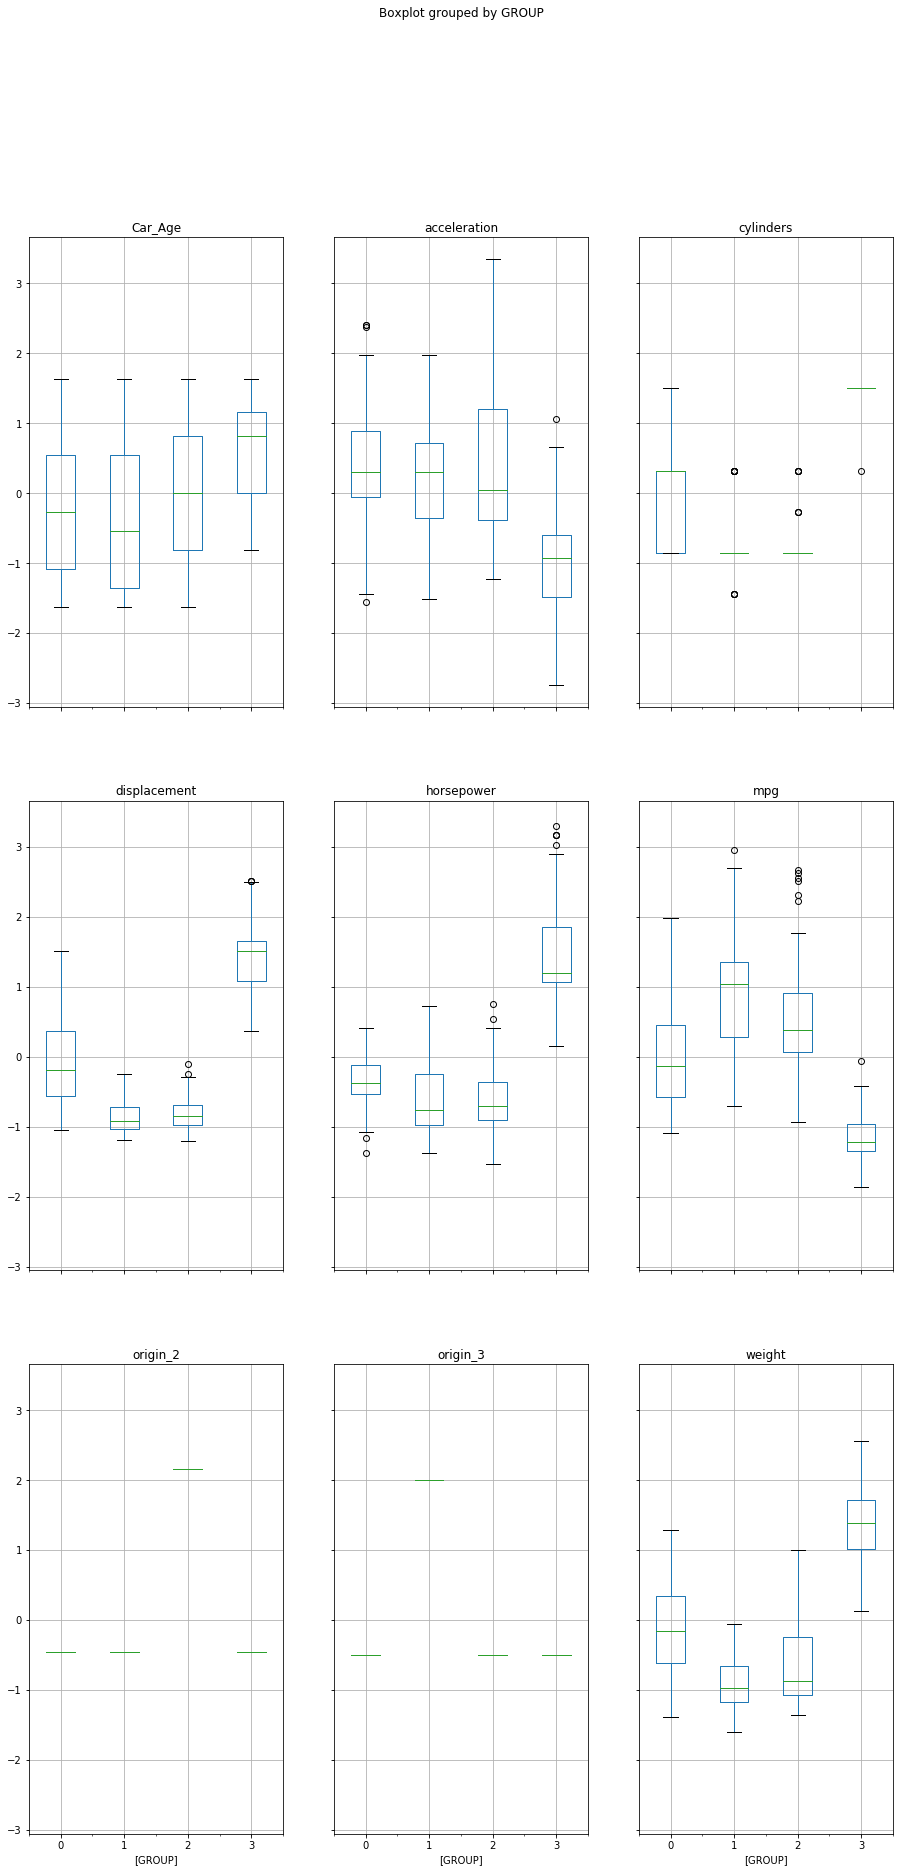

In [233]:
Cars_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

## Observations:
### There are outliers in horsepower, accelaration, displacement, mpg
### Lets treat the outliers with median

In [234]:
# Addressing outliers at group level

data = Cars_data_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(Cars_data_z['GROUP']))

C:\Users\Iyyappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017583726EF0>,
      dtype=object)

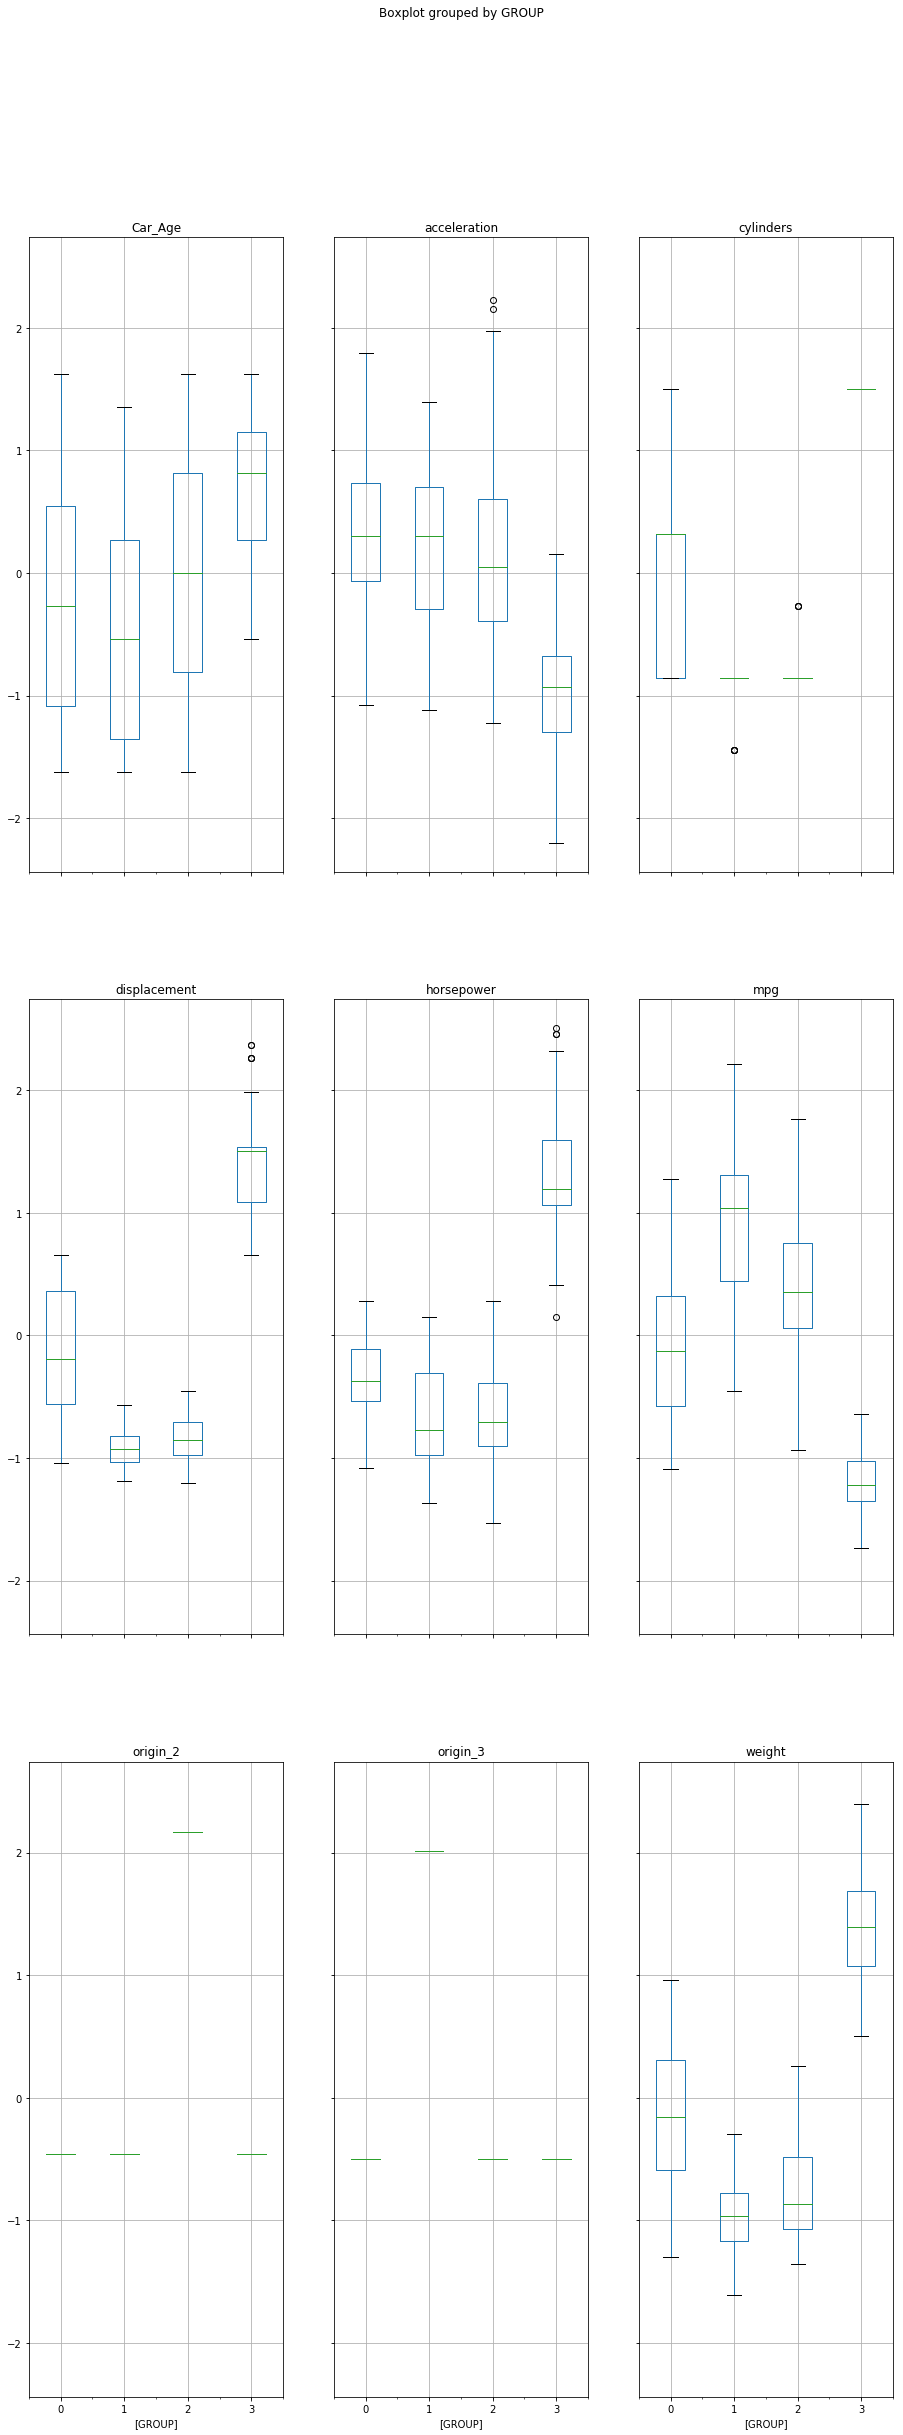

In [235]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(15, 40))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

In [236]:
Cars_data_z.groupby("GROUP").count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,Car_Age,origin_2,origin_3
GROUP,,,,,,,,,
0,149,149,149,149,149,149,149,149,149
1,79,79,79,79,79,79,79,79,79
2,70,70,70,70,70,70,70,70,70
3,100,100,100,100,100,100,100,100,100


In [237]:
Cars_data_z.groupby("GROUP").mpg.describe()

,count,mean,std,min,25%,50%,75%,max
GROUP,,,,,,,,
0,149.0,0.022034,0.727473,-1.090751,-0.578335,-0.129971,0.446497,1.983745
1,79.0,0.888537,0.780159,-0.706439,0.279962,1.035775,1.349630,2.957335
2,70.0,0.560693,0.861362,-0.937026,0.062185,0.382445,0.914077,2.662696
3,100.0,-1.127260,0.309552,-1.859374,-1.346959,-1.218855,-0.962647,-0.065919


## Observations:
### Group 3 has the highest car age, horsepower and the lowest mpg.
### Group 1 has the highest mpg and the least car age.
### The groups/clusters are ovelapping. clear distinction among groups is not there. 
### We might get clear distinction among groups, if we have 3 clusters.